Still to do:
* Improve Data Exploration Visuals

# Project Aim

Credit card companies want to be able to protect their clients by detecting fraudulent credit card transactions.  It should also be noted that being able to detect fraud in a timely manner is beneficial.
Lastly being too cautiious is not practical and would frustrate clients

# Data Background

The datasets contains transactions made by credit cards in **September 2013** by European cardholders. 

The dataset presents transactions that occurred in two days and is **highly imbalanced**.
* We have **492 frauds** out of **284,807 transactions**.
* The positive class (frauds) account for **0.172%** of all transactions.

The dataset contains only numerical input variables which are the result of a **PCA transformation**.
* Due to confidentiality issues, there are not provided the original features and more background information about the data.
* Features V1, V2, ... V28 are the principal components obtained with PCA;

The only features which have not been transformed with PCA are **Time** and **Amount**. 
* Feature **Time** contains the seconds elapsed between each transaction and the first transaction in the dataset. 
* Feature **Amount** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
* Feature **Class** is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Library Imports

In [1]:
# Dataframes
import pandas as pd
import numpy as np

# Graphing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Scaling
from sklearn.preprocessing import RobustScaler

# Data Import & Exploration

Data Information:
* Apart from Time, Amount and Class, the features have all gone through a PCA transformation.
* We can assume that these altered features have also been scaled.

Exploration Summary:
* The data is heavily imbalanced, with only 0.017% of observations being frauds
* No Null Values

In [2]:
df = pd.read_csv('../data/raw/creditcard.gz', compression='gzip', index_col=0)
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.923752e-15,5.559442e-16,-8.769520e-15,2.759583e-15,-1.549320e-15,2.005278e-15,-1.695447e-15,-1.933764e-16,-3.136288e-15,...,1.540693e-16,7.961936e-16,5.402018e-16,4.459446e-15,1.446667e-15,1.705578e-15,-3.668456e-16,-1.203990e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Distribution of "Class" feature

In [6]:
non_fraud_pct= round(df['Class'].value_counts()[0]/len(df) * 100,2)
fraud_pct = round(df['Class'].value_counts()[1]/len(df) * 100,2)

print('Non-Fraud:\t{}%\nFraud:\t\t{}%'.format(non_fraud_pct, fraud_pct))

Non-Fraud:	99.83%
Fraud:		0.17%


* The classes are heavily imbalanced.
* If we simply use this distribution of Classes for our predictive models, the models will overfit.  
    * This will cause the models to assume that most cases are not fraud, however we want our model to be certain when a fraud occurs

### Distribution of "Amount" feature

Amount mean: 88.35


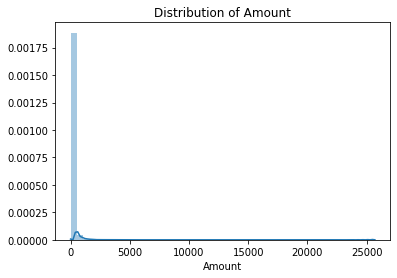

In [7]:
ax = sns.distplot(df['Amount']);
ax.set_title('Distribution of Amount');

amount_mean = round(df['Amount'].mean(),2)
print('Amount mean: {}'.format(amount_mean))

### Distribution of observations over "Time"

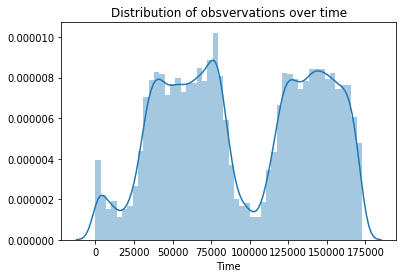

In [8]:
ax = sns.distplot(df['Time']);
ax.set_title('Distribution of obsvervations over time');

### Null Values

In [9]:
df.isnull().sum().sum()

0

* We can see there are no Null Values

# Data Cleaning

## Drop Duplicated Rows

In [10]:
df.duplicated().sum()

1081

In [11]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

# Save Cleaned DataFrame

In [12]:
# Save our cleaned dataframe and compress it
df.to_csv('../data/processed/cleaned_dataframe.gz', index=0, compression='gzip')

## Scaling
Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.

If we do not scale, it will degrade the predictive performance of some machine learning models.  More precisely, unscaled data may either slow down or even prevent a convergence in a gradient-based estimating model (such as linear or logistic regression).

As we saw from the "Distribution of Amount", the data is not normally distributed and there are a lot of outliers in our data, so we have chosen to use Robust Scaling, rather than Standard Scaling.  

In [13]:
# Make a copy of our cleaned dataframe
df_scaled = df.copy()

In [14]:
df_scaled['Scaled_Amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df_scaled['Scaled_Time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

In [15]:
df_scaled.drop(['Time', 'Amount'], axis=1, inplace=True)

# Save Cleaned DataFrame (Scaled)

In [16]:
# Save our cleaned dataframe and compress it
df_scaled.to_csv('../data/processed/cleaned_dataframe_scaled.gz', index=0, compression='gzip')